In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load the dataset into python environment

In [2]:
data = pd.read_csv(r'C:\Users\akshathi\Downloads\titanic_dataset.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Make ‘PassengerId’ as the index column

In [4]:
data['PassengerId'].isna().sum()

0

In [5]:
# setting index as PassengerId
data.set_index('PassengerId',inplace=True)

In [6]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Check the basic details of the dataset

In [7]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data.shape

(891, 11)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


### Fill in all the missing values present in all the columns in the dataset

In [10]:
# finding count of null values
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [11]:
data['Age'].mean()

29.69911764705882

In [12]:
data['Age'].median()

28.0

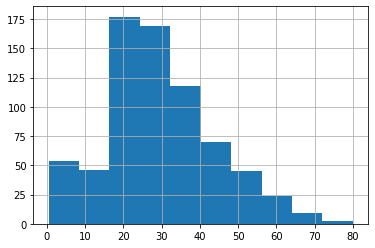

In [13]:
data['Age'].hist()
plt.show()

In [14]:
# missing values in age to be filled with median
data['Age'] = data['Age'].fillna(data['Age'].median())

In [15]:
data['Age'].isna().sum()

0

In [16]:
# Cabin contains a large number of NaN values so we can drop Cabin column
data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [17]:
# column embarked 2 missing values can be filled with the value found most in the column
# finding mode
data['Embarked'].mode()

0    S
dtype: object

In [18]:
# filling the missing values in embarked with the mode value
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [19]:
# finally checking the count of null values
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [20]:
# dropping Cabin column
data.drop('Cabin',axis=1,inplace=True)

In [21]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

### Check and handle outliers in at least 3 columns in the dataset

In [22]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

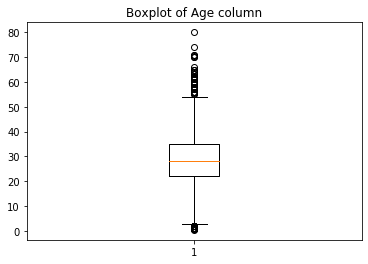

In [23]:
plt.boxplot(data['Age'])
plt.title('Boxplot of Age column')
plt.show()

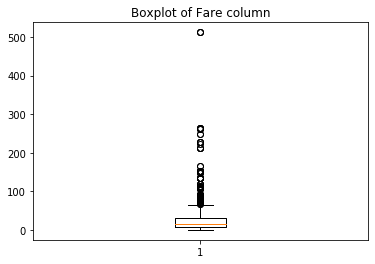

In [24]:
plt.boxplot(data['Fare'])
plt.title('Boxplot of Fare column')
plt.show()

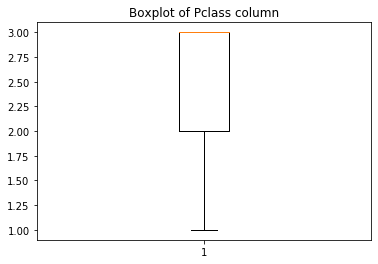

In [25]:
plt.boxplot(data['Pclass'])
plt.title('Boxplot of Pclass column')
plt.show()

In [26]:
Q1 = np.percentile(data['Fare'], 25, interpolation='midpoint')
Q2 = np.percentile(data['Fare'], 50, interpolation='midpoint')
Q3 = np.percentile(data['Fare'], 75, interpolation='midpoint')

In [27]:
# finding quartiles of fare
print(Q1)
print(Q2)
print(Q3)

7.9104
14.4542
31.0


In [28]:
# finding inter quartile range of fare
IQR = Q3-Q1
print(IQR)

23.0896


In [29]:
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print(low_lim)
print(up_lim)

-26.724
65.6344


In [30]:
outlier = []
for x in data['Fare']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [31]:
print(outlier)

[71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 79.2, 78.2667, 153.4625, 77.9583, 69.3, 76.7292, 73.5, 113.275, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 71.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 80.0, 83.1583, 69.55, 89.1042, 164.8667, 69.55, 83.1583]


In [32]:
# no need to eliminate the outliers in fare, age or Pclass, eliminating outlier may eliminate a
# significant amount of rows, which is unnecesary.

### Do min max scaling on the feature set (Take ‘Survived’ as target)

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
min_max_scaler = MinMaxScaler(feature_range=(0,1))

In [35]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [36]:
# encoding values in sex column
data['Sex'] = pd.get_dummies(data['Sex'])

In [37]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,S


In [38]:
# splitting data into features and target
X = data.drop(['Survived','Name','Embarked','Ticket','Fare'], axis=1)
y = data['Survived']

In [39]:
X

,Pclass,Sex,Age,SibSp,Parch
PassengerId,,,,,
1,3,0,22.0,1,0
2,1,1,38.0,1,0
3,3,1,26.0,0,0
4,1,1,35.0,1,0
5,3,0,35.0,0,0
...,...,...,...,...,...
887,2,0,27.0,0,0
888,1,1,19.0,0,0
889,3,1,28.0,1,2


In [40]:
# performing minmax scaler
X = min_max_scaler.fit_transform(X)

In [41]:
# checking minmaxscaler's effect on the model 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(X_train, y_train)
predictions = model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
print('Mean Square Error is:', mean_squared_error(y_test, predictions))
print('R Squared Value is: ',r2_score(y_test, predictions))

Mean Square Error is: 0.13510887504638677
R Squared Value is:  0.44285412286212633
